# SVM vs PCA

In [35]:
%matplotlib inline
import scipy
import numpy as np
import pandas as pd
from pylab import *
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [36]:
def createClusteredData(dimensions,observations,clusters,sigma_div):
    pointsPerCluster = int(1.0*observations/clusters)
    x = []
    y = []
    for cluster in range(clusters):
        centroid = [ np.random.uniform() for dim in range(dimensions) ]        
        sigma = [ (np.random.normal()/sigma_div[cluster])**2 for dim in range(dimensions) ]
        for point in range(pointsPerCluster):
            x.append([np.random.normal(centroid[dim],sigma[dim]) for dim in range(dimensions)])
            y.append(cluster)
    x = np.array(x)
    y = np.array(y)
    return x,y

In [37]:
data = createClusteredData(4,1000,5,[1,2,3,4,5])

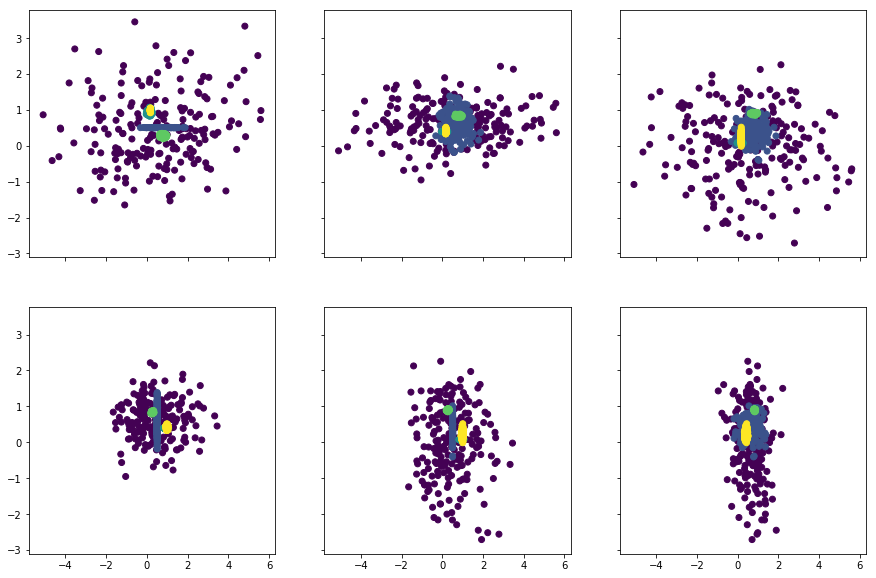

In [38]:
fig,axes=plt.subplots(2,3,sharex=True,sharey=True,figsize=(15, 10))
axes=axes.flatten()
axes[0].scatter(data[0][:,0],data[0][:,1],c=data[1].astype(np.float))
axes[1].scatter(data[0][:,0],data[0][:,2],c=data[1].astype(np.float))
axes[2].scatter(data[0][:,0],data[0][:,3],c=data[1].astype(np.float))
axes[3].scatter(data[0][:,1],data[0][:,2],c=data[1].astype(np.float))
axes[4].scatter(data[0][:,1],data[0][:,3],c=data[1].astype(np.float))
axes[5].scatter(data[0][:,2],data[0][:,3],c=data[1].astype(np.float))
plt.show()

In [39]:
df=pd.DataFrame(data[0],columns=['d1','d2','d3','d4'])
df['type']=data[1]
df.head()

,d1,d2,d3,d4,type
0,2.390764,0.416020,0.255148,0.525492,0
1,1.681258,0.175297,1.080756,1.101520,0
2,4.871728,1.227234,0.630711,-0.889762,0
3,2.097445,0.284854,0.169073,-0.352747,0
4,-1.257755,1.746401,1.749623,0.256326,0


In [40]:
df['type'].unique()

array([0, 1, 2, 3, 4])

In [41]:
train,test=train_test_split(df,test_size=0.2,stratify=df['type'])

In [42]:
train.groupby('type').size()

type
0    160
1    160
2    160
3    160
4    160
dtype: int64

In [43]:
test.groupby('type').size()

type
0    40
1    40
2    40
3    40
4    40
dtype: int64

In [44]:
models = [svm.SVC(kernel='rbf', C=1.0).fit(train[['d1','d2','d3','d4']], train[['type']]),
          svm.SVC(kernel='sigmoid', C=1.0).fit(train[['d1','d2','d3','d4']], train[['type']]),
          svm.SVC(kernel='linear', C=1.0).fit(train[['d1','d2','d3','d4']], train[['type']]),
          svm.SVC(kernel='poly', degree=2, C=1.0).fit(train[['d1','d2','d3','d4']], train[['type']]),
          svm.SVC(kernel='poly', degree=5, C=1.0).fit(train[['d1','d2','d3','d4']], train[['type']]),
          svm.SVC(kernel='poly', degree=10, C=1.0).fit(train[['d1','d2','d3','d4']], train[['type']])]
for model in models:
    print(model.kernel + (' {}'.format(model.degree) if model.kernel=='poly' else ''))
    print(confusion_matrix(test[['type']],model.predict(test[['d1','d2','d3','d4']])))

rbf
[[36  1  1  2  0]
 [ 0 39  0  1  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0  5  0 35]]
sigmoid
[[ 9  8 11 11  1]
 [27 11  0  2  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0 13  0 27]]
linear
[[16  2  9 12  1]
 [ 0 40  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0  4  0 36]]
poly 2
[[32  2  1  5  0]
 [ 0 39  0  1  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0 12  0 28]]
poly 5
[[24  1  9  6  0]
 [ 0 12 26  2  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 0  0 17  0 23]]
poly 10
[[27  0 11  2  0]
 [ 0  1 36  3  0]
 [ 0  0 40  0  0]
 [ 0  0 19 21  0]
 [ 0  0 31  0  9]]


In [45]:
pca_2D=PCA(n_components=2, whiten=True).fit(train[['d1','d2','d3','d4']])
pca_2D.explained_variance_ratio_

array([ 0.60025945,  0.20848916])

In [46]:
pca_2D_train = pca_2D.transform(train[['d1','d2','d3','d4']])
pca_2D_train[:10]

array([[-2.35300008,  0.35000983],
       [ 0.37541189,  0.60199175],
       [ 0.47188717,  0.5852578 ],
       [ 0.39459439,  0.56456063],
       [ 0.2502457 , -1.23734353],
       [-0.88633462, -0.44566065],
       [ 0.30524544,  0.42310403],
       [-0.46193416, -1.09591234],
       [-2.4835936 , -2.02624223],
       [ 0.45620872,  0.65966136]])

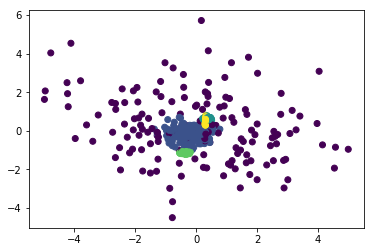

In [47]:
plt.figure()
plt.scatter(pca_2D_train[:,0],pca_2D_train[:,1],c=train[['type']])
plt.show()

In [48]:
pca_2D_test = pca_2D.transform(test[['d1','d2','d3','d4']])
pca_2D_test[:10]

array([[ 0.31160311,  0.67452643],
       [ 0.49353169, -0.81372099],
       [ 0.4462764 ,  0.56020552],
       [ 0.31221299,  0.5948212 ],
       [ 0.31010058,  0.56319808],
       [-0.38656043, -1.12911316],
       [-0.02791223, -0.27477934],
       [-0.11904365,  0.50708931],
       [-3.85617165,  1.71652219],
       [ 0.37581841,  0.62442696]])

In [49]:
def getDistances(point_pca,train_pca,train_labels):
    distances=np.apply_along_axis(lambda x: np.linalg.norm(point_pca-x),1,pca_2D_train)
    distances=np.array(np.hstack([train_labels,np.matrix(distances).T]))
    return distances[distances[:,1].argsort()]

In [50]:
distances=getDistances(np.array([0,0]),pca_2D_train,train[['type']])

In [51]:
def castVote(distances,k):
    return int(scipy.stats.mode(distances[:k][:,0])[0][0])

In [52]:
castVote(distances,10)

1

In [53]:
class KNN():
    def train(self,train_features,train_labels):
        self.train_features=train_features
        self.train_labels=train_labels
    def predict(self,individuals,k):
        predictions=[]
        for individual in individuals:
            distances=np.apply_along_axis(lambda x: np.linalg.norm(individual-x),1,self.train_features)
            distances=np.array(np.hstack([self.train_labels,np.matrix(distances).T]))
            distances=distances[distances[:,1].argsort()]
            predictions.append(int(scipy.stats.mode(distances[:k][:,0])[0][0]))
        return predictions

In [54]:
myKNN=KNN()
myKNN.train(pca_2D_train,train[['type']])
myKNN.predict(np.array([[0,0]]),10)

[1]

In [59]:
pcas=[]
for n in range(4):
    numDim=n+1
    pca=PCA(n_components=numDim, whiten=True).fit(train[['d1','d2','d3','d4']])
    er=pca.explained_variance_ratio_
    pca_train = pca.transform(train[['d1','d2','d3','d4']])
    pca_test = pca.transform(test[['d1','d2','d3','d4']])
    pcas.append([numDim,pca,er,pca_train,pca_test])
train_labels=train[['type']]
test_labels=test[['type']]

In [60]:
for pca in pcas:
    print(pca[2])

[ 0.60025945]
[ 0.60025945  0.20848916]
[ 0.60025945  0.20848916  0.13463938]
[ 0.60025945  0.20848916  0.13463938  0.05661201]


In [61]:
for pca in pcas:
    myKNN=KNN()
    myKNN.train(pca[3],train_labels)
    for k in [1,3,5,7,9]:
        print("PCA {}D, K {}".format(pca[0],k))
        print(confusion_matrix(test_labels,myKNN.predict(pca[4],k)))

PCA 1D, K 1
[[31  6  1  2  0]
 [12 21  1  5  1]
 [ 4  3 30  0  3]
 [ 1  9  0 30  0]
 [ 0  0  2  0 38]]
PCA 1D, K 3
[[31  7  1  1  0]
 [ 6 24  2  7  1]
 [ 0  2 34  0  4]
 [ 1  8  0 31  0]
 [ 0  0  2  0 38]]
PCA 1D, K 5
[[31  6  1  2  0]
 [ 3 26  2  8  1]
 [ 0  2 34  0  4]
 [ 1  5  0 34  0]
 [ 0  0  2  0 38]]
PCA 1D, K 7
[[30  7  1  2  0]
 [ 2 28  2  7  1]
 [ 0  1 35  0  4]
 [ 0  7  0 33  0]
 [ 0  0  1  0 39]]
PCA 1D, K 9
[[30  7  1  2  0]
 [ 1 30  1  7  1]
 [ 0  0 36  0  4]
 [ 0  4  0 36  0]
 [ 0  0  0  0 40]]
PCA 2D, K 1
[[36  3  0  0  1]
 [ 1 39  0  0  0]
 [ 0  0 34  0  6]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
PCA 2D, K 3
[[34  5  0  0  1]
 [ 0 40  0  0  0]
 [ 0  0 34  0  6]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
PCA 2D, K 5
[[32  5  0  2  1]
 [ 0 40  0  0  0]
 [ 0  0 34  0  6]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
PCA 2D, K 7
[[32  5  0  2  1]
 [ 0 40  0  0  0]
 [ 0  0 34  0  6]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
PCA 2D, K 9
[[32  5  1  2  0]
 [ 0 40  0  0  0]
 [ 0  0 34  0  6]
 [ 0  0